


## Dataset
The dataset used is default of credit card clients Data Set.


Features: 

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [5]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load your training data set
df_creditDefault_train = pd.read_csv("/content/gdrive/MyDrive/CreditDefault_training.csv")
df_creditDefault_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,50000,2,2,2,24,-1,-1,-1,-1,0,...,6561,5091,353,1572,1572,6561,102,353,27000,0
1,70000,2,2,2,24,0,0,0,0,0,...,64733,66680,71243,3000,3000,2500,3000,5800,0,0
2,420000,1,1,1,43,-2,-2,-2,-2,-2,...,2846,3027,5946,14274,8232,2853,3027,5946,32053,0
3,30000,1,2,3,53,1,-2,-1,2,0,...,3825,3825,0,0,4070,0,0,0,0,1
4,50000,2,2,1,49,1,2,2,2,0,...,21951,22287,22778,1000,3321,0,1000,1000,1001,0


In [8]:
# Split training data into X and y
X = df_creditDefault_train.drop(columns = 'default.payment.next.month')
y = df_creditDefault_train[['default.payment.next.month']]
# replaced sex with male, female and marriage with marital status
X = X.replace(to_replace = {'SEX': {1: 'male', 2:'female'}, 'MARRIAGE' : {1: 'married', 2: 'single', 3: 'others'}})
X.head()
#y.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,female,2,single,24,-1,-1,-1,-1,0,...,1572,6561,5091,353,1572,1572,6561,102,353,27000
1,70000,female,2,single,24,0,0,0,0,0,...,63882,64733,66680,71243,3000,3000,2500,3000,5800,0
2,420000,male,1,married,43,-2,-2,-2,-2,-2,...,7324,2846,3027,5946,14274,8232,2853,3027,5946,32053
3,30000,male,2,others,53,1,-2,-1,2,0,...,4070,3825,3825,0,0,4070,0,0,0,0
4,50000,female,2,married,49,1,2,2,2,0,...,22608,21951,22287,22778,1000,3321,0,1000,1000,1001


## Exploratory Data Analysis

#### 1) Check for null values
#### 2) Plotting the histograms of the features
#### 3) Plot the bar plot of the categorical columns
#### 4) Compare the relationship of the Age with Credit Default

In [9]:
#check null values in each column
X.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [10]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,female,2,single,24,-1,-1,-1,-1,0,...,1572,6561,5091,353,1572,1572,6561,102,353,27000
1,70000,female,2,single,24,0,0,0,0,0,...,63882,64733,66680,71243,3000,3000,2500,3000,5800,0
2,420000,male,1,married,43,-2,-2,-2,-2,-2,...,7324,2846,3027,5946,14274,8232,2853,3027,5946,32053
3,30000,male,2,others,53,1,-2,-1,2,0,...,4070,3825,3825,0,0,4070,0,0,0,0
4,50000,female,2,married,49,1,2,2,2,0,...,22608,21951,22287,22778,1000,3321,0,1000,1000,1001


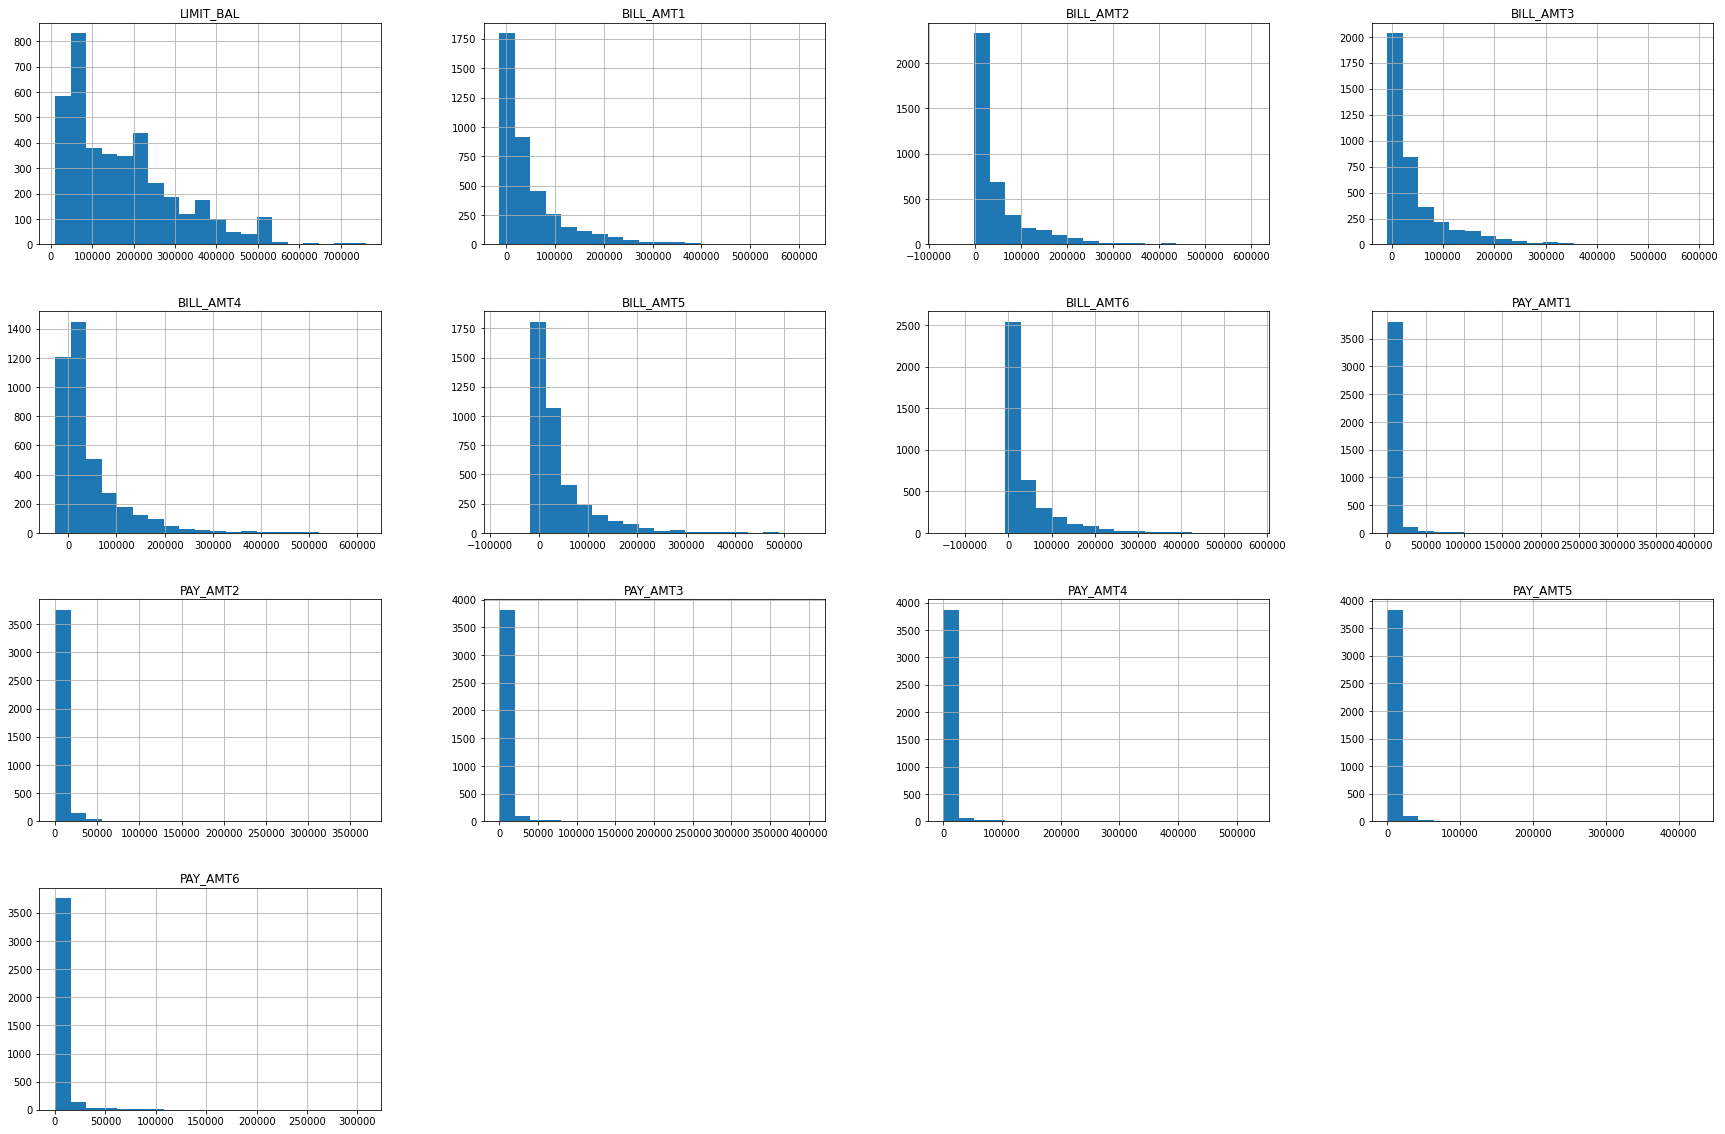

In [11]:
#Plotting histograms of features
%matplotlib inline
X_numerical = X.drop(columns = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3', 'PAY_4', 'PAY_5','PAY_6'])
X_numerical.hist(figsize = (30,20), bins = 20)
plt.show()

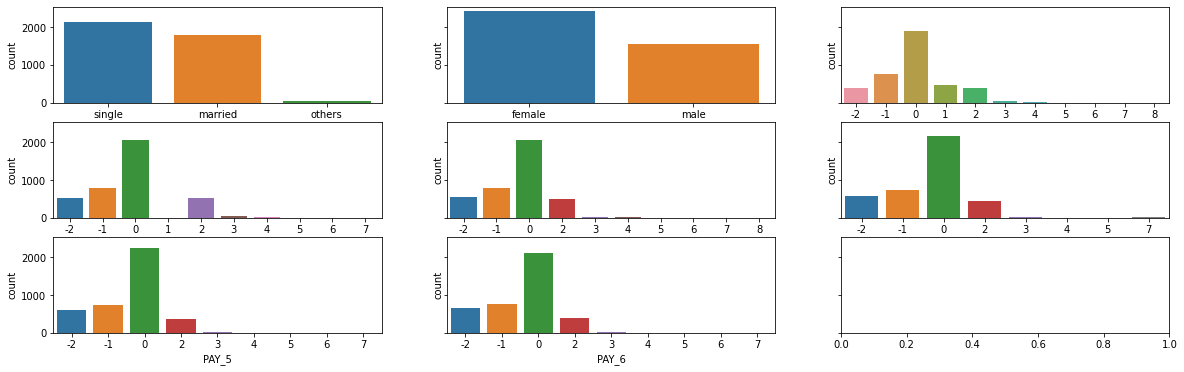

In [12]:
#Plotting bar plots for categorical variables
%matplotlib inline

fig, axes = plt.subplots(3,3, sharey = True, figsize=(20,6))

sns.countplot(x="SEX", data=X, ax = axes[0][1])
sns.countplot(x="MARRIAGE", data=X, ax = axes[0][0])
sns.countplot(x="PAY_1", data=X, ax = axes[0][2])
sns.countplot(x="PAY_2", data=X, ax = axes[1][0])
sns.countplot(x="PAY_3", data=X, ax = axes[1][1])
sns.countplot(x="PAY_4", data=X, ax = axes[1][2])
sns.countplot(x="PAY_5", data=X, ax = axes[2][0])
sns.countplot(x="PAY_6", data=X, ax = axes[2][1])
plt.show()


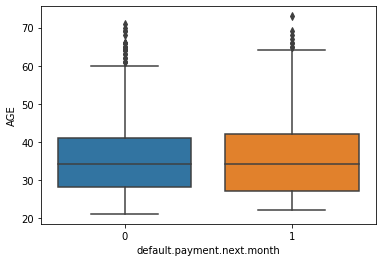

In [13]:
#Comparing relationship of AGE with Credit Default
%matplotlib inline
sns.boxplot(x="default.payment.next.month", y="AGE", data=df_creditDefault_train)

plt.show()

In [15]:
# Load test data set
X_test = pd.read_csv("/content/gdrive/MyDrive/CreditDefault_Xtest.csv")
X_test = X_test.replace(to_replace = {'SEX': {1: 'male', 2:'female'}, 'MARRIAGE' : {1: 'married', 2: 'single', 3: 'others'}})

In [16]:
#standardization and one-hot encoding 

#Standardization
categories = ['SEX','MARRIAGE','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_wo_categories = X.drop(columns = categories)
X_test_wo_categories = X_test.drop(columns = categories)

scaler.fit(X_wo_categories)
X_wo_categories = pd.DataFrame(scaler.transform(X_wo_categories), columns = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])
X_test_wo_categories = pd.DataFrame(scaler.transform(X_test_wo_categories), columns = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])

#One Hot Encoding

X_categories = X[categories]
X_test_categories = X_test[categories]

#Creating one hot encoder with all values even if they are missing in the training set
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories = [['male','female'],['married','single','others'],[1,2,3,4,5,6],[-2,-1,0,1,2,3,4,5,6,7,8,9],[-2,-1,0,1,2,3,4,5,6,7,8,9],[-2,-1,0,1,2,3,4,5,6,7,8,9],[-2,-1,0,1,2,3,4,5,6,7,8,9],[-2,-1,0,1,2,3,4,5,6,7,8,9],[-2,-1,0,1,2,3,4,5,6,7,8,9]])

encoder.fit(X_categories)
X_categories_OHE = pd.DataFrame(encoder.transform(X_categories).toarray(), columns = encoder.get_feature_names(categories))
X_test_categories_OHE = pd.DataFrame(encoder.transform(X_test_categories).toarray(), columns = encoder.get_feature_names(categories))

#Dropping the first columns
columns_first_dropped = ['SEX_male','MARRIAGE_married','EDUCATION_1','PAY_1_-1','PAY_2_-1','PAY_3_-1','PAY_4_-1','PAY_5_-1','PAY_6_-1']
X_categories_OHE = X_categories_OHE.drop(columns = columns_first_dropped)
X_test_categories_OHE = X_test_categories_OHE.drop(columns = columns_first_dropped)
#X_test_categories_OHE.head()
X_categories_OHE.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,SEX_female,MARRIAGE_single,MARRIAGE_others,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,PAY_1_-2,PAY_1_0,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = pd.concat((X_wo_categories, X_categories_OHE), axis = 1)
X_test = pd.concat((X_test_wo_categories, X_test_categories_OHE), axis = 1)

X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,-0.902690,-1.237370,-0.659401,-0.657623,-0.653395,-0.558590,-0.564919,-0.630095,-0.264370,-0.244519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.751263,-1.237370,0.123571,0.174192,0.222944,0.299113,0.397532,0.500862,-0.175510,-0.171175,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.898720,0.816144,-0.573530,-0.484216,-0.572498,-0.613365,-0.597173,-0.540866,0.526037,0.097548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.054118,1.896941,-0.680080,-0.679090,-0.618263,-0.598931,-0.584702,-0.635727,-0.362190,-0.116218,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.902690,1.464622,-0.427412,-0.411319,-0.357541,-0.331676,-0.296197,-0.272334,-0.299963,-0.154688,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,2.504431,0.491905,2.154786,2.249624,2.419276,2.557744,1.846357,1.751360,0.260328,0.189638,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3981,1.671579,-0.805051,-0.661388,-0.661528,-0.645646,-0.622610,-0.625645,-0.582393,-0.281669,-0.215705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3982,-0.372694,-0.696972,0.687235,0.648951,0.720830,0.847630,0.961260,1.054152,-0.362190,-0.094133,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3983,-0.675549,0.708064,-0.079045,-0.041863,-0.006120,0.056998,0.127373,0.168754,-0.237736,-0.222536,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [19]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of X_val : {X_val.shape}')
print(f'Shape of X_test : {X_test.shape}')

Shape of X_train : (2789, 88)
Shape of y_train : (2789, 1)
Shape of X_val : (1196, 88)
Shape of X_test : (1000, 88)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier. 


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels
logisticRegressor = LogisticRegression()
### WRITE CODE HERE ###
logisticRegressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
### WRITE CODE HERE ###
logisticRegressor_500 = LogisticRegression(max_iter = 5000)
### WRITE CODE HERE ###
logisticRegressor_500.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [23]:
# predict the output for validation dataset
### WRITE CODE HERE
y_pred = pd.DataFrame(logisticRegressor_500.predict(X_val), columns = ['default.payment.next.month'])
y_pred.head()

,default.payment.next.month
0,0
1,0
2,1
3,0
4,0


In [24]:
from sklearn.metrics import confusion_matrix
def my_precision_recall_accuracy(y, y_preds): #TP/(TP+FP)
    cm = confusion_matrix(y,y_preds)
    tn, fp, fn, tp =  cm.ravel()
    my_precision = tp/(tp+fp) #TP/(TP+FP)
    my_recall = tp/(tp+fn) #TP/(TP+FN)
    my_accuracy = (tp+tn)/(tp+fp+fn+tn) #TP+TN/(TP+FP+TN+FN)
     
    return(my_precision,my_recall, my_accuracy)

In [25]:
precision, recall, accuracy = my_precision_recall_accuracy(y_val, y_pred)
print("Precision = ", round(precision,3))
print("Recall = ", round(recall,3))
print("Accuracy = ", round(accuracy,3))

Precision =  0.661
Recall =  0.426
Accuracy =  0.821


### ROC curve


Logistic Regression : ROC AUC=0.769


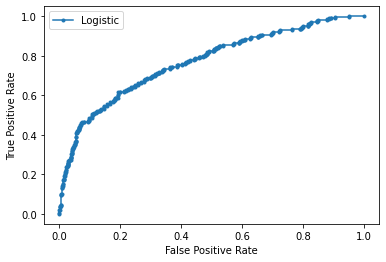

In [26]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

import matplotlib.pyplot as plt

# predict probabilities
lr_probs = logisticRegressor_500.predict_proba(X_val)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = metrics.roc_auc_score(y_val, lr_probs)
# summarize scores
print('Logistic Regression : ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


Building a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. printnig predictions on cross validation set and compute accuracy, precision and recall. 

In [27]:
logisticRegressor_500_C01_Pl1 = LogisticRegression(C= 0.1, penalty = 'l1', max_iter = 500, solver = 'saga')
logisticRegressor_500_C01_Pl1.fit(X_train,y_train)

y_pred_500_C01_Pl1 = pd.DataFrame(logisticRegressor_500_C01_Pl1.predict(X_val), columns = ['default.payment.next.month'])
y_pred_500_C01_Pl1.head()

precision_500_C01_Pl1, recall_500_C01_Pl1, accuracy_500_C01_Pl1 = my_precision_recall_accuracy(y_val, y_pred_500_C01_Pl1)
print("Precision = ", round(precision_500_C01_Pl1,3))
print("Recall = ", round(recall_500_C01_Pl1,3))
print("Accuracy = ", round(accuracy_500_C01_Pl1,3))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision =  0.677
Recall =  0.389
Accuracy =  0.82


Building a model with hyperparameter 'C' = 0.5 and penalty set = 'l1'.  

In [28]:

logisticRegressor_500_C05_Pl1 = LogisticRegression(C= 0.5, penalty = 'l1', max_iter = 500, solver = 'saga')
logisticRegressor_500_C05_Pl1.fit(X_train,y_train)

y_pred_500_C05_Pl1 = pd.DataFrame(logisticRegressor_500_C05_Pl1.predict(X_val), columns = ['default.payment.next.month'])
y_pred_500_C05_Pl1.head()

precision_500_C05_Pl1, recall_500_C05_Pl1, accuracy_500_C05_Pl1 = my_precision_recall_accuracy(y_val, y_pred_500_C05_Pl1)
print("Precision = ", round(precision_500_C05_Pl1,3))
print("Recall = ", round(recall_500_C05_Pl1,3))
print("Accuracy = ", round(accuracy_500_C05_Pl1,3))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision =  0.665
Recall =  0.426
Accuracy =  0.822


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [29]:
logisticRegressor_500_C01_Pl2 = LogisticRegression(C= 0.1, penalty = 'l2', max_iter = 5000)
logisticRegressor_500_C01_Pl2.fit(X_train,y_train)

y_pred_500_C01_Pl2 = pd.DataFrame(logisticRegressor_500_C01_Pl2.predict(X_val), columns = ['default.payment.next.month'])
y_pred_500_C01_Pl2.head()

precision_500_C01_Pl2, recall_500_C01_Pl2, accuracy_500_C01_Pl2 = my_precision_recall_accuracy(y_val, y_pred_500_C01_Pl2)
print("Precision = ", round(precision_500_C01_Pl2,3))
print("Recall = ", round(recall_500_C01_Pl2,3))
print("Accuracy = ", round(accuracy_500_C01_Pl2,3))

Precision =  0.659
Recall =  0.407
Accuracy =  0.819


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
logisticRegressor_500_C05_Pl2 = LogisticRegression(C= 0.5, penalty = 'l2', max_iter = 5000)
logisticRegressor_500_C05_Pl2.fit(X_train,y_train)

y_pred_500_C05_Pl2 = pd.DataFrame(logisticRegressor_500_C05_Pl2.predict(X_val), columns = ['default.payment.next.month'])
y_pred_500_C05_Pl2.head()

precision_500_C05_Pl2, recall_500_C05_Pl2, accuracy_500_C05_Pl2 = my_precision_recall_accuracy(y_val, y_pred_500_C05_Pl2)
print("Precision = ", round(precision_500_C05_Pl2,3))
print("Recall = ", round(recall_500_C05_Pl2,3))
print("Accuracy = ", round(accuracy_500_C05_Pl2,3))

Precision =  0.661
Recall =  0.426
Accuracy =  0.821


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
X_test

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,-0.675549,0.599985,1.497990,1.410763,1.195271,-0.372768,-0.593344,-0.448016,-0.091441,-0.144467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.902690,-0.048493,-0.045199,-0.417683,-0.419705,-0.384077,-0.360674,-0.342450,-0.264805,0.046597,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.675549,0.708064,-0.438330,-0.414473,-0.387596,-0.351035,-0.316262,-0.308213,-0.262627,-0.237945,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.069838,-0.913131,0.643418,0.394180,0.453006,-0.067989,-0.001425,-0.635727,-0.138173,-0.135222,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.054118,-0.588892,-0.548221,-0.503539,-0.469689,-0.413846,-0.379426,-0.321934,-0.175510,-0.222536,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.444437,-0.696972,-0.675384,-0.637439,-0.547267,-0.372488,-0.068746,-0.466283,-0.172398,0.143054,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,-1.129832,0.383825,-0.669820,-0.668438,-0.670019,-0.655327,-0.632287,-0.635727,-0.337922,-0.325259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1.444437,-0.264653,-0.680080,-0.679090,-0.675504,-0.655327,-0.644476,-0.635727,-0.362190,-0.325259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,-0.902690,1.680782,-0.124217,-0.074898,0.226066,-0.162780,-0.111533,-0.079438,-0.175510,-0.196855,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#  final logistic regression using the best hyperparameters obtained above 
y_pred_test = pd.DataFrame(logisticRegressor_500_C05_Pl2.predict(X_test), columns = ['default.payment.next.month'])

#prediction as "y_pred"
y_pred_test.head()

,default.payment.next.month
0,0
1,0
2,1
3,0
4,0
